# exploratory Data analysis Iris


This is a very basic tutorial to Machine Learning for complete Beginners using the Iris Dataset. You can learn how to implement a machine learning to a given dataset by following this notebook. I have explained everything related to the implementation in detail . Hope you find it useful.

<b>Objective:-</b> To classify iris flowers on basis of given Features


### About  Iris data set

This data set consists of 150 observations of Iris flower 


<b>Attributes in dataset:-<b>
1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

In [7]:
import sys
print("python :{}".format(sys.version))#checking python version
import numpy as np #for linear algebra
import pandas as pd # for data handling CSV files I/O
import sklearn
import seaborn as sns
print(sklearn.__version__)
import  matplotlib.pyplot as plt # data visulaization
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import  LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



python :3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
0.20.3


In [10]:
df= pd.read_csv("C:/users/rock/Documents/Iris.csv") #load data
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.drop('Id',axis=1,inplace=True) 


## Pair Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


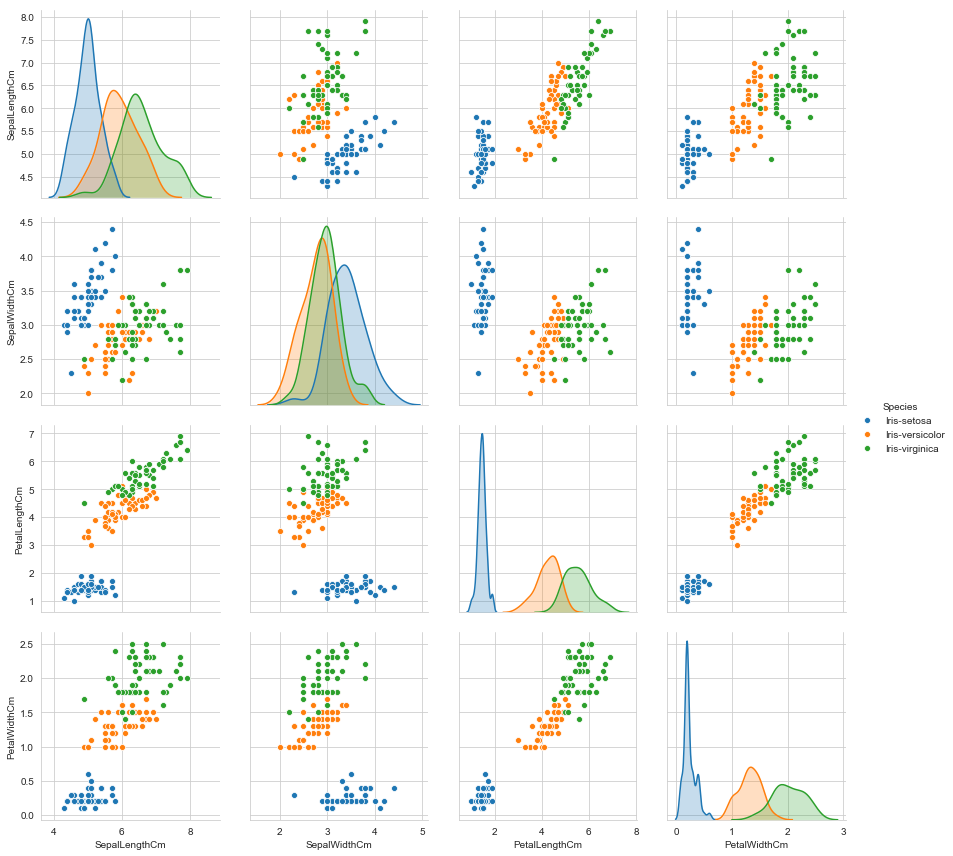

In [4]:
#pairwise scatter plot
plt.close()
sns.set_style("whitegrid")
sns.pairplot(data,hue="Species",size=3)
plt.show()


<b>Catch</b>

-we can see that in petalwdith vs petal length plot where setosa can easily identify and verginica and and versicolor have some overlap.

While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some overlap (almost linearly seperable).

<b>Note</b>  diagnol elements are PDFs for each feature. PDFs are expalined below.

# Histogram  pdf (Univariet Analysis)

Distubution plot tells how many points exist between in a particular interval. If ot has more denser region more data points present

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


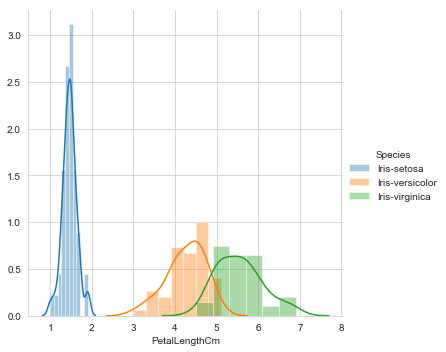

In [5]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Species",size=5)\
.map(sns.distplot,"PetalLengthCm")  \
.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


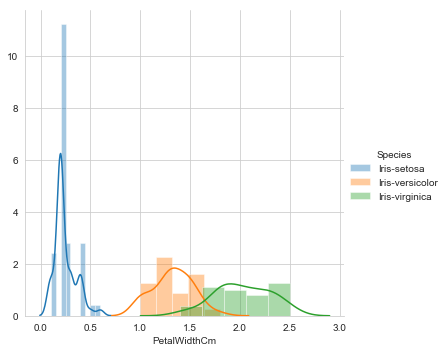

In [6]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Species",size=5)\
.map(sns.distplot,"PetalWidthCm")  \
.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


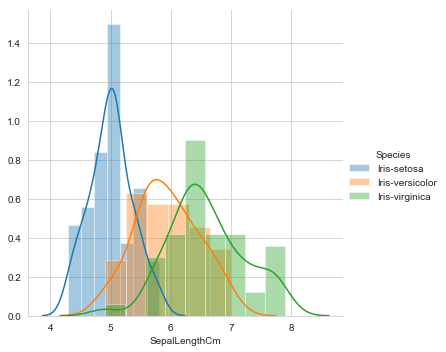

In [7]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Species",size=5)\
.map(sns.distplot,"SepalLengthCm")  \
.add_legend()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


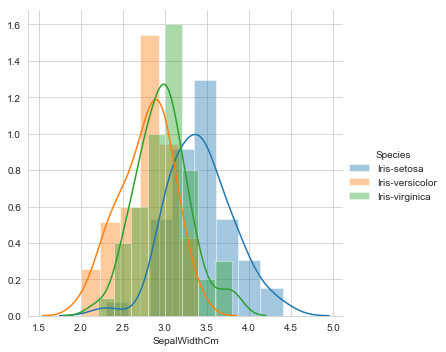

In [8]:
sns.set_style("whitegrid")
sns.FacetGrid(data,hue="Species",size=5)\
.map(sns.distplot,"SepalWidthCm")  \
.add_legend()
plt.show()

<b>Catch :- </b>
Petal length is significantly better than petal width and sepal length and sepal width are more gross to take as feature (pl>pw>>sl>>sw)

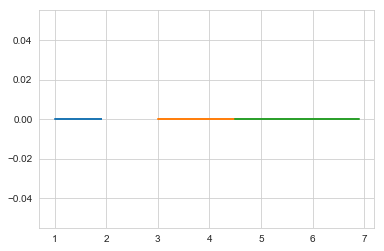

In [10]:
#1-D plot  using one feature  petallength
import numpy as np
iris_setosa=data.loc[data["Species"]=="Iris-setosa"] #creating data frames
iris_virginica=data.loc[data["Species"]=="Iris-virginica"]
iris_versicolor=data.loc[data["Species"]=="Iris-versicolor"]
plt.plot(iris_setosa["PetalLengthCm"],np.zeros_like(iris_setosa["PetalLengthCm"]))
# x-axis as petal lenght #on y axis all values equal to zero
plt.plot(iris_versicolor["PetalLengthCm"],np.zeros_like(iris_versicolor["PetalLengthCm"]))
plt.plot(iris_virginica["PetalLengthCm"],np.zeros_like(iris_virginica["PetalLengthCm"]))
plt.show()


In one dimensional plots we cant make sense of data points coz of overlapping of the points

In [11]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0             5.1           3.5            1.4           0.2  Iris-setosa
1             4.9           3.0            1.4           0.2  Iris-setosa
2             4.7           3.2            1.3           0.2  Iris-setosa
3             4.6           3.1            1.5           0.2  Iris-setosa
4             5.0           3.6            1.4           0.2  Iris-setosa
5             5.4           3.9            1.7           0.4  Iris-setosa
6             4.6           3.4            1.4           0.3  Iris-setosa
7             5.0           3.4            1.5           0.2  Iris-setosa
8             4.4           2.9            1.4           0.2  Iris-setosa
9             4.9           3.1            1.5           0.1  Iris-setosa
10            5.4           3.7            1.5           0.2  Iris-setosa
11            4.8           3.4            1.6           0.2  Iris-setosa
12            4.8           3.0       

In [12]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
print("mean")
print("iris_setosa PetalLengthCm")
print(np.mean(iris_setosa["PetalLengthCm"]))

print("\niris_versicolor PetalLengthCm")
print(np.mean(iris_versicolor["PetalLengthCm"]))

print("\niris_virginica PetalLengthCm")
print(np.mean(iris_virginica["PetalLengthCm"]))


print("\nstd:-")

print("iris_setosa PetalLengthCm")
print(np.std(iris_setosa["PetalLengthCm"])) 
print(np.std(iris_versicolor["PetalLengthCm"]))
print(np.std(iris_virginica["PetalLengthCm"]))


#printing data woth a outlier
print("mean with outlier")
print(np.mean(np.append(iris_setosa["PetalLengthCm"],50))) #appending sestosa array with 50x`x`

mean
iris_setosa PetalLengthCm
1.464

iris_versicolor PetalLengthCm
4.26

iris_virginica PetalLengthCm
5.552

std:-
iris_setosa PetalLengthCm
0.17176728442867115
0.4651881339845204
0.5463478745268441
mean with outlier
2.4156862745098038


<b>Catch:-</b> 
By Observing mean and variance we can imagine that setosa having a thin spread and virginica having wider spread compared to  all

>You can see that a outlier extreme effect on mean

## Median 

In [13]:
print("median")
print(np.median(iris_setosa["PetalLengthCm"]))
print(np.median(iris_versicolor["PetalLengthCm"]))
print(np.median(iris_virginica["PetalLengthCm"]))


#printing data woth a outlier
print("median with outlier")
print(np.median(np.append(iris_setosa["PetalLengthCm"],50))) 

median
1.5
4.35
5.55
median with outlier
1.5


<b>Catch:=</b>here we can see that median is not effected by outlier like as median

median is only effected by the median when we have more than 50% of corrupted values in our data.


for better understanding of mean mode and median visit this url:-https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/measuring-center-quantitative/v/mean-median-and-mode

## Percentiles and Quantiles

In [22]:
print("Quantiles:-") 
print("\niris_setosa PetalLengthCm")
print(np.percentile(iris_setosa["PetalLengthCm"],np.arange(0,100,25))) # Here  giving a range from 0-100 with 25 gap

print("\niris_versicolor PetalLengthCm")
print(np.percentile(iris_versicolor["PetalLengthCm"],np.arange(0,100,25)))


print("\niris_virginica PetalLengthCm")
print(np.percentile(iris_virginica["PetalLengthCm"],np.arange(0,100,25)))

#90 the percentile vvalues
print("\n90 th percentile")
print(np.percentile(iris_setosa["PetalLengthCm"],90)) #90% of values in data
print(np.percentile(iris_versicolor["PetalLengthCm"],90))
print(np.percentile(iris_virginica["PetalLengthCm"],90))

Quantiles:-

iris_setosa PetalLengthCm
[1.    1.4   1.5   1.575]

iris_versicolor PetalLengthCm
[3.   4.   4.35 4.6 ]

iris_virginica PetalLengthCm
[4.5   5.1   5.55  5.875]

90 th percentile
1.7
4.8
6.3100000000000005


<b>Catch:-</b>
here it 50 th percentile is a median value 

# Box and whiskers 

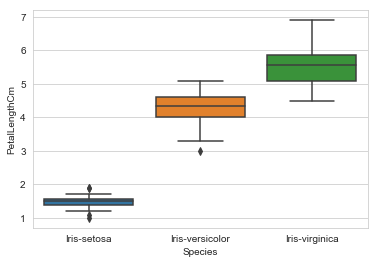

In [26]:
#box plot is a another method of putting median,percentile,quantiles
#whiskers are drawn on ideology of min and max and IQR idea
sns.boxplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

clear understanding of boxplot :-https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

# violin plot

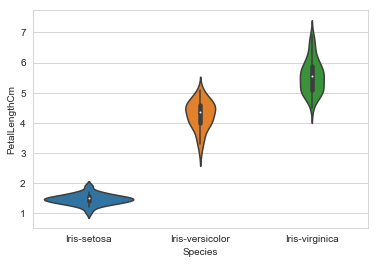

In [27]:
#violin plot mixture of both box and pdf plots
#that bell shaped spread tell us the distribution
sns.violinplot(x="Species",y="PetalLengthCm",data=data)
plt.show()

# Contour Plot 

Its a two dimensional plot having contours on it

The dark and light regions implies the density of the distribution.  


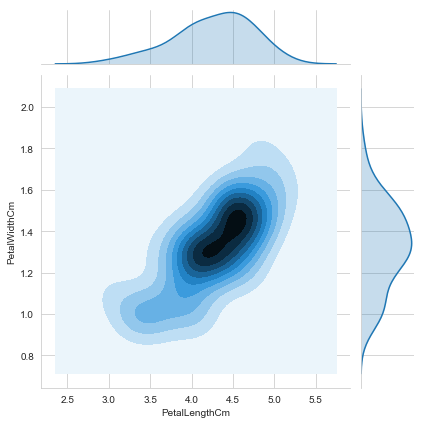

In [28]:
sns.jointplot(x="PetalLengthCm",y="PetalWidthCm",data=iris_versicolor,kind="kde")
plt.show()

<b>Catch</b>
the more petal length values lies 4.3-4.5 and petal width values lies between 1.3-1.5cm of versicolo

In [15]:
X=df.drop(["Species"],axis=1)

Y=df["Species"]

In [19]:
print(X.head())
print(X.shape)

print(Y.shape)

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
(150, 4)
(150,)


<b>Why splitting data is important??</b>

Problems with training and testing on the same data

Goal is to estimate likely performance of a model on out-of-sample data

But, maximizing training accuracy rewards overly complex models that won't necessarily generalize

Unnecessarily complex models overfit the training data


<b>Disadvantage of not slpitting data into train and test sets</b>

Your accuracy would be high but may not generalize well for future observations

Your accuracy is high because it is perfect in classifying your training data but not out-of-sample data

<b>Advatanges of splitting our data into train and test sets</b>

Good for generalizing for future observations

Model can be trained and tested on different data

Response values are known for the testing set, and thus predictions can be evaluated

Testing accuracy is a better estimate than training accuracy of out-of-sample performance


<b>Procedure for Train /test split</b>
Split the dataset into two pieces: a training set and a testing set.
    
Train the model on the training set.

Test the model on the testing set, and evaluate how well we did.

<b>Steps To Be followed When Applying an Algorithm</b>

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good.

Then pass the training dataset to the algorithm to train it. We use the .fit() method

Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.

We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [23]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=4)


In [24]:
X_train.shape

(105, 4)

In [28]:
X_test.shape

(45, 4)

In [29]:
#training the model
LR= LogisticRegression()
LR.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [35]:
 from sklearn import metrics
#making prediction x_test

predic =LR.predict(X_test)

#comparing actual values of Y_test and predicted values of predic

print("accuracy_score on logistics regression algorithm is ",metrics.accuracy_score(y_test,predic))

accuracy_score on logistics regression algorithm is  0.9333333333333333


# KNeighborsClassifier alogrithm

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [63]:
knn.predict([[8, 3, 0, 2]]) #SepalLengthCm	SepalWidthCm	PetalLengthCm	PetalWidthCm

array(['Iris-setosa'], dtype=object)

In [47]:
# try K=1 through K=50 with 5 interval and record testing accuracy
k_range = range(1, 50,5)

scores = []
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    

print(scores)


[0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556, 0.9777777777777777, 0.9777777777777777, 0.9333333333333333]


Text(0, 0.5, 'Testing Accuracy')

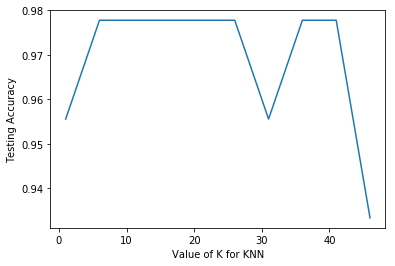

In [49]:
# plot how accuracy changes as we vary k
import matplotlib.pyplot as plt
%matplotlib inline

%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [50]:
print("max accuracy",max(scores))

max accuracy 0.9777777777777777


In [55]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5)
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores.mean())

0.9727272727272727


Here I have trained model for all 4 features but if you see in our Eploratory data analysis our main features are PetalLengthCm	PetalWidthCm

So 

In [64]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
13,4.3,3.0,1.1,0.1
15,5.7,4.4,1.5,0.4
61,5.9,3.0,4.2,1.5
91,6.1,3.0,4.6,1.4
116,6.5,3.0,5.5,1.8


In [66]:
#im creating a data frame with only two features Petalenght and petal width
X1=X_train[['PetalLengthCm','PetalWidthCm']]

Xt =X_test[['PetalLengthCm','PetalWidthCm']]

In [67]:
X1.head(4)

,PetalLengthCm,PetalWidthCm
13,1.1,0.1
15,1.5,0.4
61,4.2,1.5
91,4.6,1.4


In [68]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X1, y_train)
y_pred = knn.predict(Xt)
print(metrics.accuracy_score(y_test, y_pred))

0.9777777777777777


In [71]:
#im creating a data frame with only two features Petalenght and petal width
X2=X_train[['SepalLengthCm','SepalWidthCm']]

Xt2 =X_test[['SepalLengthCm','SepalWidthCm']]

In [72]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2, y_train)
y_pred = knn.predict(Xt2)
print(metrics.accuracy_score(y_test, y_pred))

0.8666666666666667


<b>observations

Using "{petal length and petalwidth}"  gives more accuracy than using 
"{Sepalwidth and sepal lenght}"

Here I used simple machine learning algorithms for classification i.e KNN and LogisticRegression to achieve iris task 


                                            Thanks 